In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('C:/Users/Chugu/Downloads/2nd_Sem/machine_learning/Final Project/Superstore - Sales.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,CoGS
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516


In [4]:
data.shape

(9994, 20)

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [6]:
df.columns = [c.replace(" ", "_") for c in df.columns]
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,CoGS
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row_ID        9994 non-null   int64         
 1   Order_ID      9994 non-null   object        
 2   Order_Date    9994 non-null   datetime64[ns]
 3   Ship_Date     9994 non-null   datetime64[ns]
 4   Ship_Mode     9994 non-null   object        
 5   Customer_ID   9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Postal_Code   9994 non-null   int64         
 10  Region        9994 non-null   object        
 11  Product_ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product_Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [116]:
df.isnull().sum()

Row_ID          0
Order_ID        0
Order_Date      0
Ship_Date       0
Ship_Mode       0
Customer_ID     0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Product_ID      0
Category        0
Sub-Category    0
Product_Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
CoGS            0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [8]:
columns_to_drop = ['Row_ID', 'Country']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,CoGS
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516


In [10]:
# Count unique values in each column
unique_value_counts = df.nunique()
print(unique_value_counts)

Order_ID        5009
Order_Date      1237
Ship_Date       1334
Ship_Mode          4
Customer_ID      793
City             531
State             49
Postal_Code      631
Region             4
Product_ID      1862
Category           3
Sub-Category      17
Product_Name    1818
Sales           5825
Quantity          14
Discount          12
Profit          7287
CoGS            6632
dtype: int64


In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order_Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship_Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal_Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
CoGS,9994.0,201.201105,0.5544,12.6882,41.664,182.2263,24449.5584,550.839414


In [12]:
print("The old and new order date in the records:", min(df['Order_Date']),"-",max(df['Order_Date']))
print("The old and new ship date in the records:", min(df['Ship_Date']),"-", max(df['Ship_Date']))

The old and new order date in the records: 2014-01-03 00:00:00 - 2017-12-30 00:00:00
The old and new ship date in the records: 2014-01-07 00:00:00 - 2018-01-05 00:00:00


In [13]:
unique_categories = df['Category'].unique()

# Iterate over unique categories
for category in unique_categories:
    # Filter DataFrame for the current category
    subcategories = df[df['Category'] == category]['Sub-Category'].unique()
    
    # Print category and its subcategories
    print(f"Category: {category}")
    print("Subcategories:")
    for subcategory in subcategories:
        print(subcategory)
    print()

Category: Furniture
Subcategories:
Bookcases
Chairs
Tables
Furnishings

Category: Office Supplies
Subcategories:
Labels
Storage
Art
Binders
Appliances
Paper
Envelopes
Fasteners
Supplies

Category: Technology
Subcategories:
Phones
Accessories
Machines
Copiers



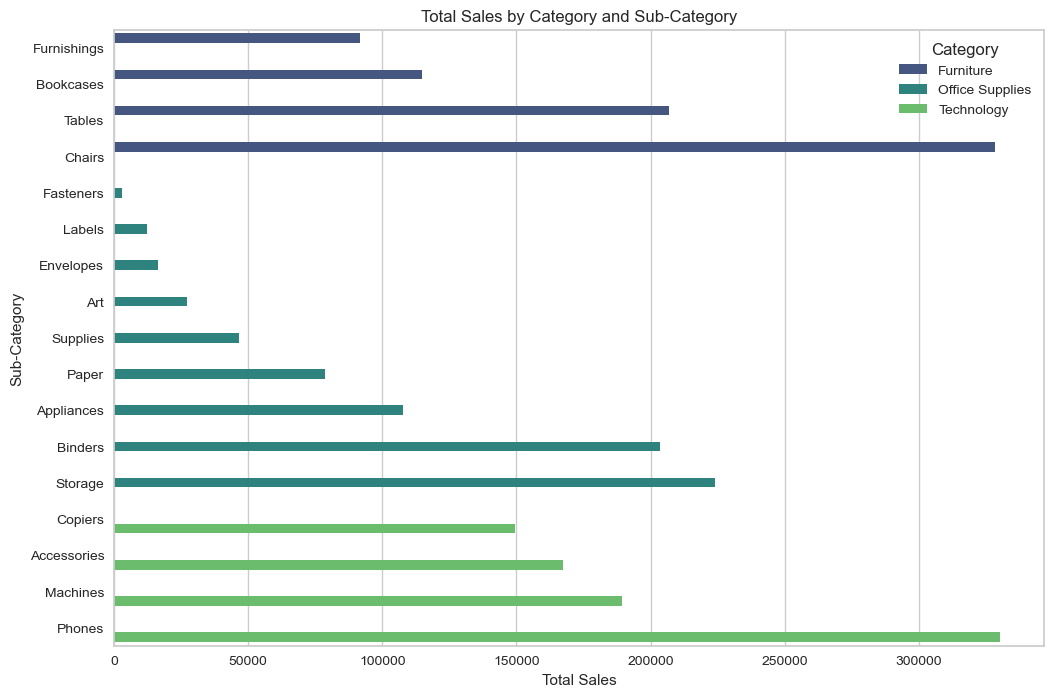

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Category' and 'Sub-Category' and calculate the total sales for each sub-category
sales_by_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Sort the data by category and then by sales within each category in ascending order
sales_by_subcategory_sorted = sales_by_subcategory.sort_values(by=['Category', 'Sales'])

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=sales_by_subcategory_sorted, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Category and Sub-Category')
plt.legend(title='Category')
plt.show()

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

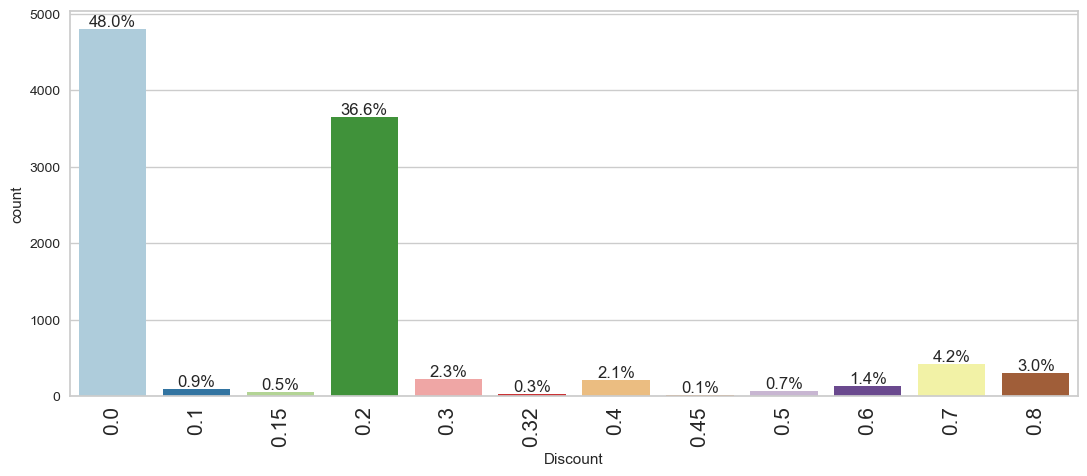

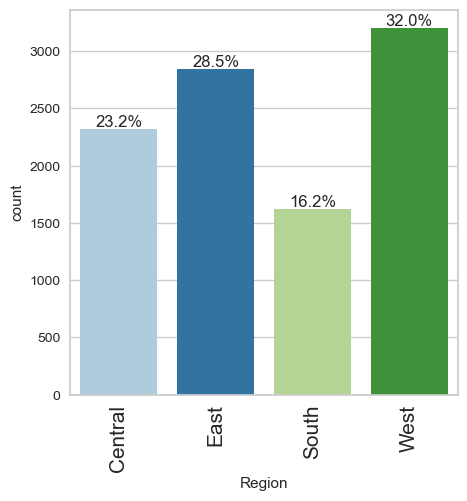

In [16]:
labeled_barplot(df, "Discount", perc=True)
labeled_barplot(df, "Region", perc=True)

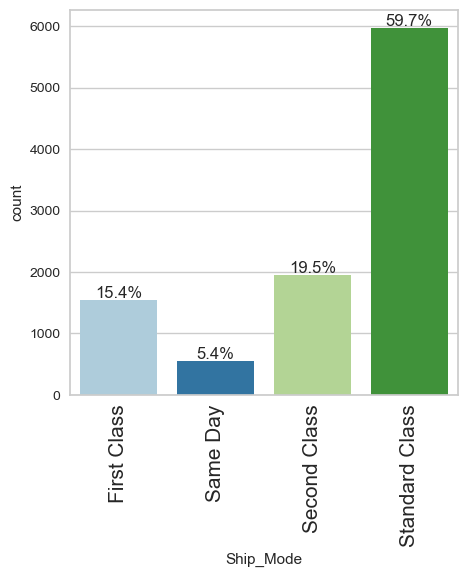

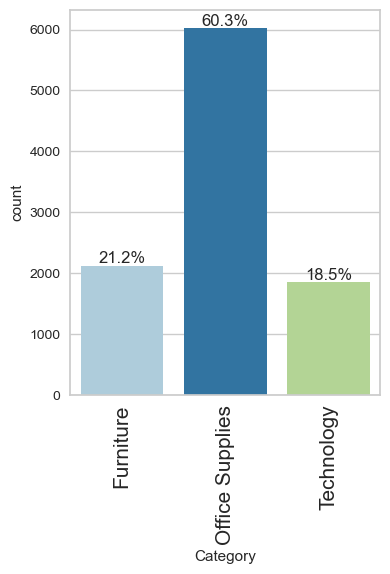

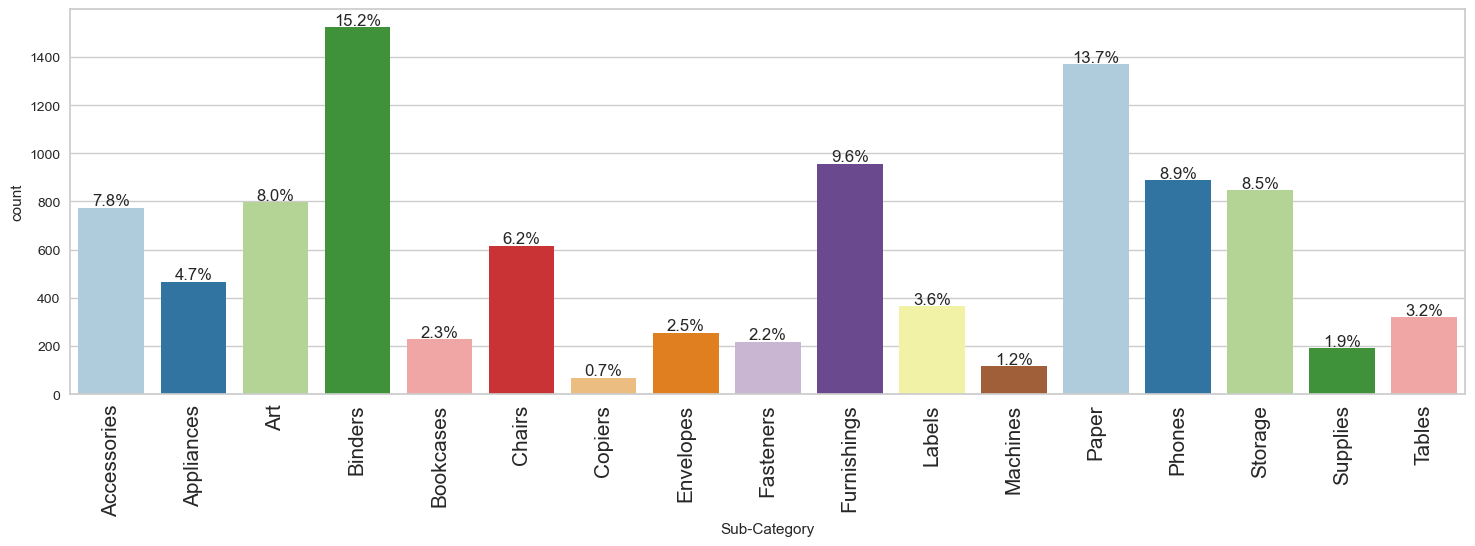

In [17]:
labeled_barplot(df, "Ship_Mode", perc=True)
labeled_barplot(df, "Category", perc=True)
labeled_barplot(df, 'Sub-Category', perc=True)

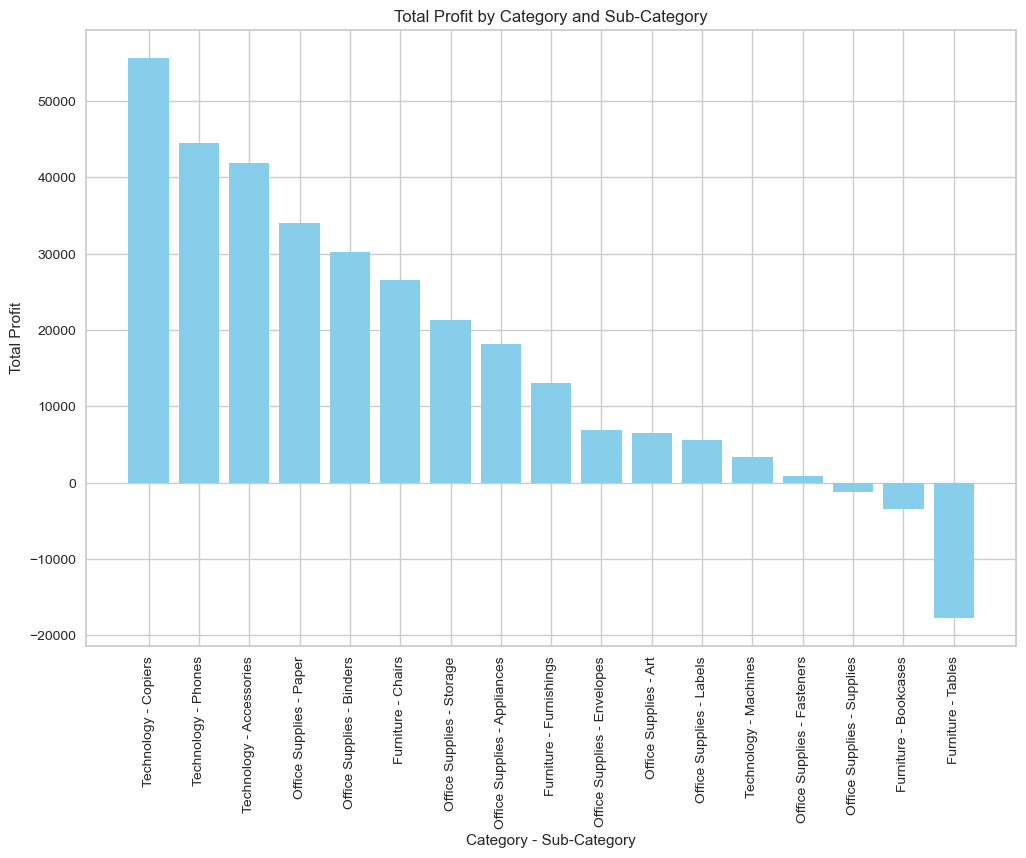

In [18]:
import matplotlib.pyplot as plt

# Group the data by 'Category' and 'Sub-Category' and calculate the total profit for each combination
profit_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Sort the data by profit in descending order
profit_by_category_subcategory_sorted = profit_by_category_subcategory.sort_values(by='Profit', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(profit_by_category_subcategory_sorted['Category'] + ' - ' + profit_by_category_subcategory_sorted['Sub-Category'],
        profit_by_category_subcategory_sorted['Profit'], color='skyblue')
plt.xlabel('Category - Sub-Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Category and Sub-Category')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

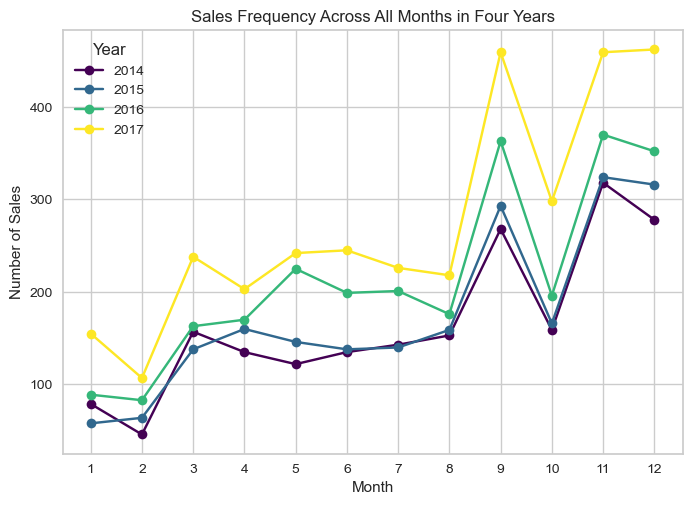

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime if it's not already in datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract the year and month from the 'Order Date' column
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

# Group the data by year and month and count the number of sales for each month
sales_frequency_by_month = df.groupby(['Year', 'Month']).size()

# Create a line plot
plt.figure(figsize=(10, 6))
sales_frequency_by_month.unstack(level=0).plot(kind='line', marker='o', cmap='viridis')
plt.title('Sales Frequency Across All Months in Four Years')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [20]:
df['Customer_ID'] = df['Customer_ID'].str.extract('(\d+)').astype(int)
df['Customer_ID']

0       12520
1       12520
2       13045
3       20335
4       20335
        ...  
9989    21400
9990    13060
9991    13060
9992    13060
9993    12220
Name: Customer_ID, Length: 9994, dtype: int32

### Don't Consider

In [64]:
df1 = df.copy()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\clust

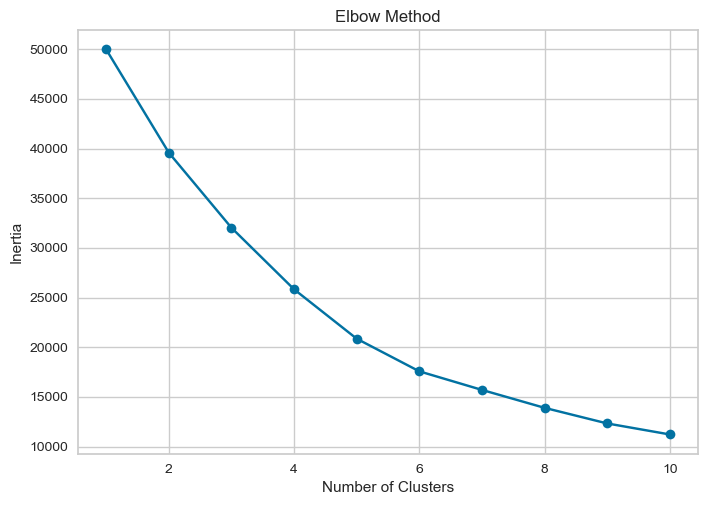

In [65]:
features = ['Sales', 'Quantity', 'Discount', 'Profit', 'CoGS']
X = df1[features]

# Preprocess the data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.4527432151738992)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.5068504615075065)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.45161167144382214)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.4194561464775372)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.4247105449796965)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.4302045480906692)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.4298158494792635)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.3852544184487088)


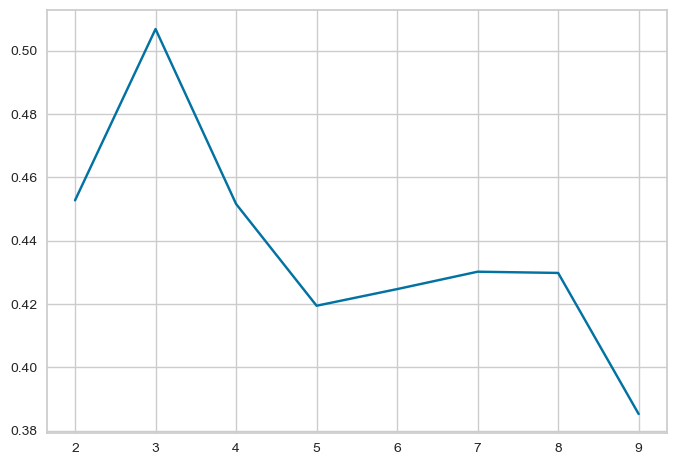

In [66]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((X_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(X_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Sales  Quantity  Discount      Profit         CoGS
0   178.710628  3.730571  0.093237   31.682031   147.028596
1  3741.673024  6.578231  0.102517  844.717440  2896.955584
2   167.629093  3.881162  0.645977 -100.139627   267.768719


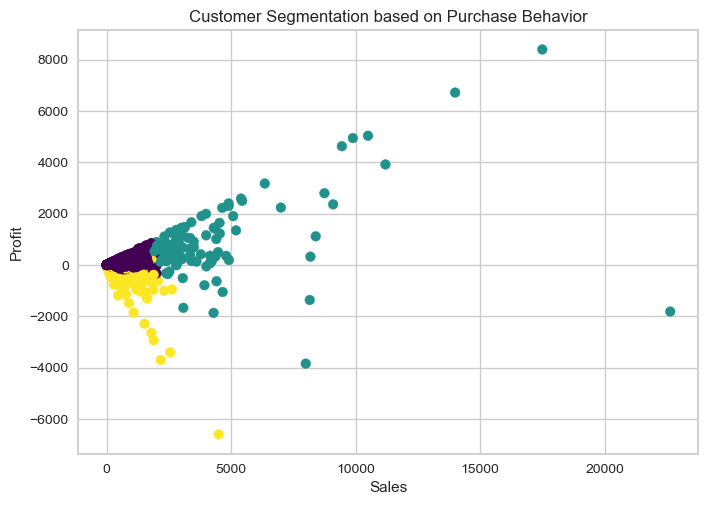

In [67]:
k = 3  # Example: Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=40)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
df1['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Scale back the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)

# Optionally, analyze characteristics of each cluster (e.g., average sales, profit, etc.)

# Visualize the clusters (if applicable)
# Example: 2D plot of Sales vs. Profit
plt.scatter(df1['Sales'], df1['Profit'], c=df1['Cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Customer Segmentation based on Purchase Behavior')
plt.show()

In [68]:
df1.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,City,State,Postal_Code,Region,Product_ID,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,CoGS,Year,Month,Cluster
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,12520,Henderson,Kentucky,42420,South,FUR-BO-10001798,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464,2016,11,0
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,12520,Henderson,Kentucky,42420,South,FUR-CH-10000454,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580,2016,11,0
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,13045,Los Angeles,California,90036,West,OFF-LA-10000240,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486,2016,6,0
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,20335,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085,2015,10,2
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,20335,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516,2015,10,0


### Till this point

- You can use this data for customer segmentation based on purchase behaviour

In [78]:
import pyodbc
import pandas as pd

def sqlOperation(df, table_name):
  con = pyodbc.connect(
      r"Driver= {ODBC Driver 17 for SQL Server};"
      r"Server=SUKUMAR\SQLEXPRESS;"
      r"Database=SuperStore;"
      r"Trusted_Connection=yes;"
  )
  
  cursor = con.cursor()

  sqlq = f"INSERT INTO {table_name} ({', '.join(df.columns)}) VALUES ({', '.join(['?'] * len(df.columns))})"

  for index, row in df.iterrows():
      values = tuple(row)
      cursor.execute(sqlq, values)
  con.commit()


### customer segmentation based on RFM Analysis

In [69]:
df2 = df.copy()

In [70]:
from datetime import datetime, timedelta

df2['Order_Date'] = pd.to_datetime(df2['Order_Date'])

# Calculate Recency, Frequency, and Monetary value
snapshot_date = df2['Order_Date'].max() + timedelta(days=1)    # Snapshot date is the last date in the dataset + 1 day
rfm_table = df2.groupby('Customer_ID').agg({
    'Order_Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order_ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary value
})

# Rename columns for clarity
rfm_table.rename(columns={'Order_Date': 'Recency', 'Order_ID': 'Frequency', 'Sales': 'Monetary'}, inplace=True)

# Assign RFM scores
rfm_segmentation = rfm_table.copy()
rfm_segmentation['R'] = pd.qcut(rfm_segmentation['Recency'], q=4, labels=[4, 3, 2, 1])  # Recency score (1 = highest)
rfm_segmentation['F'] = pd.qcut(rfm_segmentation['Frequency'], q=4, labels=[1, 2, 3, 4])  # Frequency score (4 = highest)
rfm_segmentation['M'] = pd.qcut(rfm_segmentation['Monetary'], q=4, labels=[1, 2, 3, 4])  # Monetary score (4 = highest)

# Combine RFM scores into a single RFM segment
rfm_segmentation['RFM_Segment'] = rfm_segmentation['R'].astype(str) + rfm_segmentation['F'].astype(str) + rfm_segmentation['M'].astype(str)

# Calculate RFM score
rfm_segmentation['RFM_Score'] = rfm_segmentation[['R', 'F', 'M']].sum(axis=1)

rfm_segmentation.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,
10015,416,6,886.156,1,1,1,111,3
10030,13,11,1744.700,4,2,2,422,8
10045,89,10,3050.692,2,2,3,223,7
10060,55,18,7755.620,3,4,4,344,11
10075,35,20,3250.337,3,4,3,343,10


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

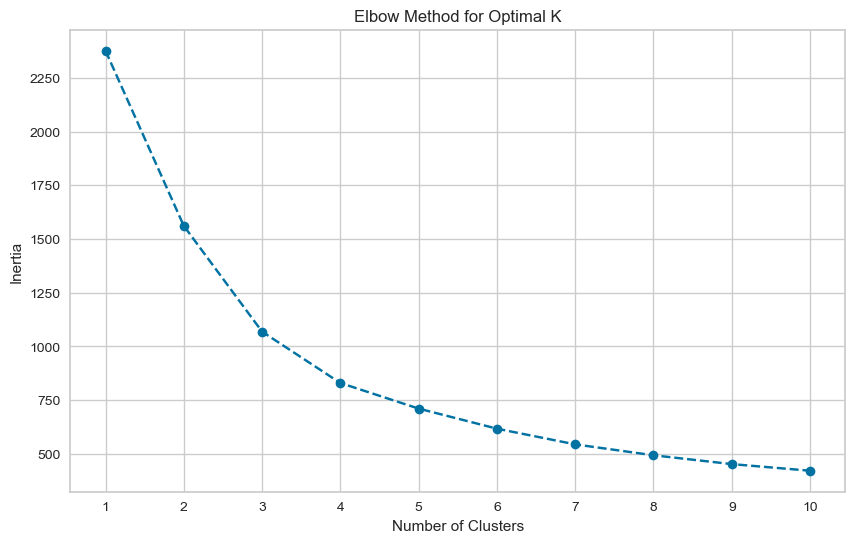

In [71]:
rfm_for_clustering = rfm_segmentation[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
# This step is important for K-means clustering as it is sensitive to the scale of the features
rfm_for_clustering_standardized = (rfm_for_clustering - rfm_for_clustering.mean()) / rfm_for_clustering.std()

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=32)
    kmeans.fit(rfm_for_clustering_standardized)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.34649507007512326)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.3871394677353283)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.3582345210505294)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.3289716093142158)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.3193347604798193)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.33229532825743346)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.2987601297514492)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.3042989594997186)


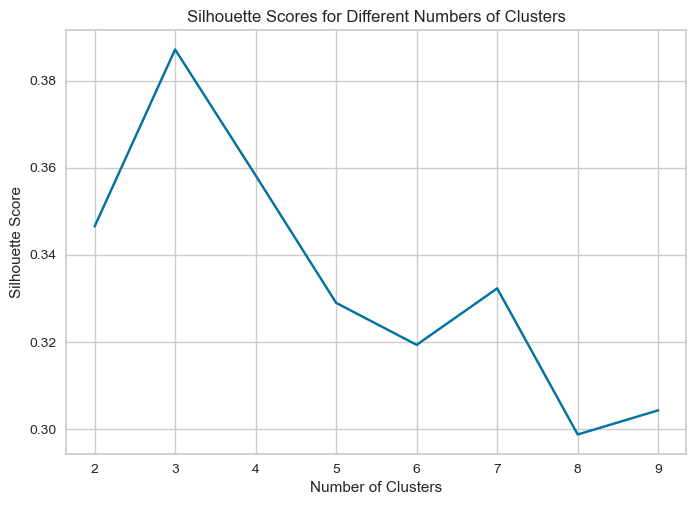

In [72]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((rfm_for_clustering_standardized))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(rfm_for_clustering_standardized, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_list)
plt.show()

In [73]:
# Based on the elbow curve, choose the optimal number of clusters
optimal_k = 3  # Example: choose 3 clusters

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(rfm_for_clustering_standardized)

# Assign cluster labels to the original RFM segmentation data
rfm_segmentation['Cluster'] = kmeans.labels_

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [74]:
# For example, you can calculate cluster means for Recency, Frequency, Monetary, and RFM_Score
rfm_data = rfm_segmentation[['Recency', 'Frequency', 'Monetary', 'RFM_Score','Cluster']]  # Correct syntax for selecting multiple columns
cluster_means = rfm_data.groupby('Cluster').mean()
print("\nCluster Means:")
print(cluster_means)


Cluster Means:
            Recency  Frequency     Monetary  RFM_Score
Cluster                                               
0         81.894737  20.033493  5744.671218  10.229665
1         83.856531  10.511777  1955.582758   6.946467
2        520.769231   7.675214  1566.730151   4.350427


In [75]:
cluster_names = {
    0: 'Inactive Customers',
    1: 'High-Value Loyal Customers',
    2: 'Moderate Value Customers'
}

# Assign cluster names using the map function
cluster_means['Cluster'] = cluster_means.index.map(cluster_names)

cluster_means

,Recency,Frequency,Monetary,RFM_Score,Cluster
Cluster,,,,,
0,81.894737,20.033493,5744.671218,10.229665,Inactive Customers
1,83.856531,10.511777,1955.582758,6.946467,High-Value Loyal Customers
2,520.769231,7.675214,1566.730151,4.350427,Moderate Value Customers


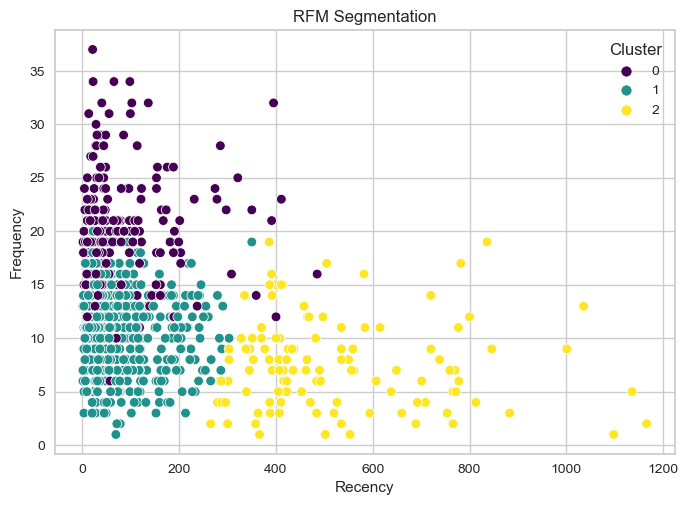

In [76]:
# Plot clusters using scatter plot
sns.scatterplot(data=rfm_data, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('RFM Segmentation')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [77]:
cluster_names = {
    0: 'Inactive Customers',
    1: 'High-Value Loyal Customers',
    2: 'Moderate Value Customers'
}

rfm_segmentation["Cluster"] = rfm_segmentation["Cluster"].map(cluster_names)

rfm_segmentation.head()
rfm_segmentation.rename(columns={ 'R': 'Recency_Scores','F':'Frequency_Score','M':'Monetary_Score' }, inplace= True) 
rfm_segmentation.reset_index(inplace=True)
rfm_segmentation.head()

,Customer_ID,Recency,Frequency,Monetary,Recency_Scores,Frequency_Score,Monetary_Score,RFM_Segment,RFM_Score,Cluster
0,10015,416,6,886.156,1,1,1,111,3,Moderate Value Customers
1,10030,13,11,1744.700,4,2,2,422,8,High-Value Loyal Customers
2,10045,89,10,3050.692,2,2,3,223,7,High-Value Loyal Customers
3,10060,55,18,7755.620,3,4,4,344,11,Inactive Customers
4,10075,35,20,3250.337,3,4,3,343,10,Inactive Customers


In [80]:
rfm_segmentation.info()

sqlOperation(rfm_segmentation,"RFM_Master")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Customer_ID      793 non-null    int32   
 1   Recency          793 non-null    int64   
 2   Frequency        793 non-null    int64   
 3   Monetary         793 non-null    float64 
 4   Recency_Scores   793 non-null    category
 5   Frequency_Score  793 non-null    category
 6   Monetary_Score   793 non-null    category
 7   RFM_Segment      793 non-null    object  
 8   RFM_Score        793 non-null    int64   
 9   Cluster          793 non-null    object  
dtypes: category(3), float64(1), int32(1), int64(3), object(2)
memory usage: 43.3+ KB


- You can use this data for customer segmentation based on RFM Analysis

### Profitability-driven Customer Clustering:

In [84]:
df3 = df.copy()

In [85]:
customer_features = df3.groupby('Customer_ID').agg({
    'Sales': 'sum',      # Total sales for each customer
    'Quantity': 'sum',   # Total quantity purchased by each customer
    'Discount': 'mean',  # Average discount applied by each customer
    'Profit': 'sum',     # Total profit generated by each customer
    'CoGS': 'sum'        # Total Cost of Goods Sold for each customer
}).reset_index()

# Print the first few rows of the resulting DataFrame
customer_features.head()

,Customer_ID,Sales,Quantity,Discount,Profit,CoGS
0,10015,886.156,13,0.066667,129.3465,756.8095
1,10030,1744.700,54,0.090909,365.2152,1379.4848
2,10045,3050.692,48,0.355000,-253.5746,3304.2666
3,10060,7755.620,56,0.044444,2054.5885,5701.0315
4,10075,3250.337,75,0.135000,281.1890,2969.1480


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

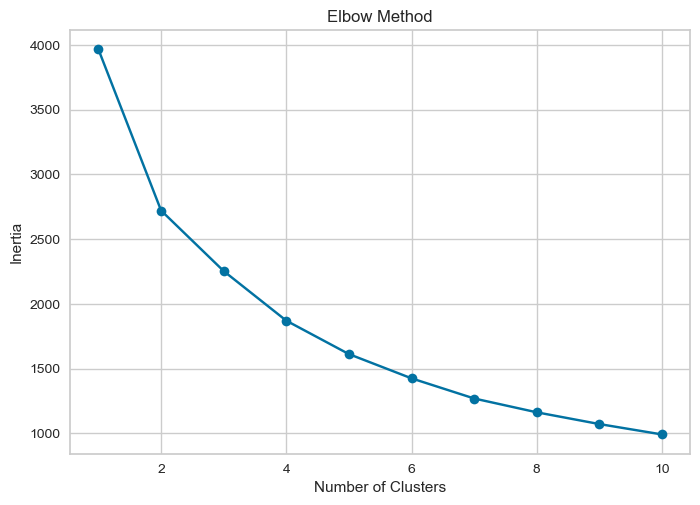

In [86]:
features = ['Sales', 'Quantity', 'Discount', 'Profit', 'CoGS']
X = customer_features[features]

# Preprocess the data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.41


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.28


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.26


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.27


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.27


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.27


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.27


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.24


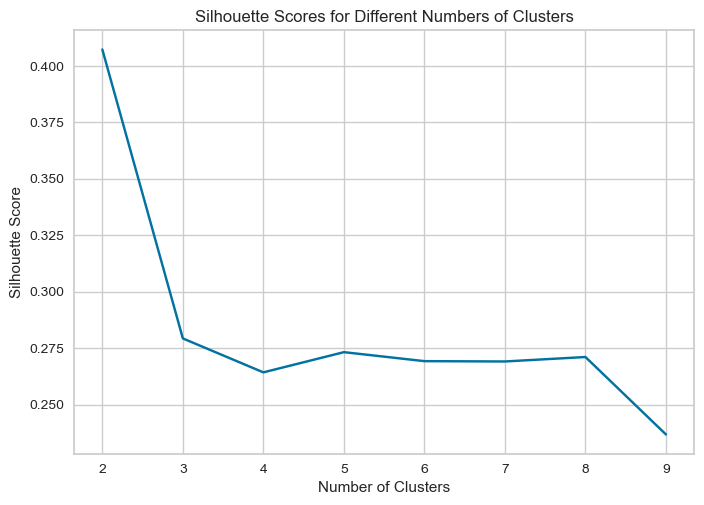

In [87]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_scaled) # Assuming X_scaled is defined
    score = silhouette_score(X_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {:.2f}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_list)
plt.show()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


         Sales   Quantity  Discount       Profit         CoGS
0  3836.709232  66.212625  0.155084   354.282718  3482.426514
1  1368.846903  31.366972  0.163555   140.854202  1227.992701
2  9741.680925  76.196429  0.123083  2113.312346  7628.368579


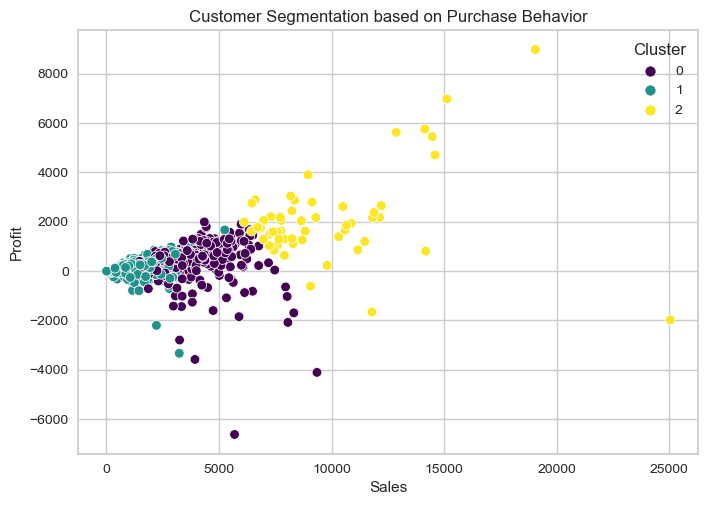

In [88]:
k = 3  # Example: Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=20)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
customer_features['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Scale back the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)

# Optionally, analyze characteristics of each cluster (e.g., average sales, profit, etc.)

# Visualize the clusters (if applicable)
# Example: 2D plot of Sales vs. Profit
sns.scatterplot(data=customer_features, x='Sales', y='Profit', hue='Cluster', palette='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Customer Segmentation based on Purchase Behavior')
plt.show()

In [89]:
cluster_names = {
    0: "Discount Seekers",
    1: "Revenue Generators",
    2: "Efficient Profiteers"
}

# Assign cluster names using the map function
cluster_centers_df['Cluster_Name'] = cluster_centers_df.index.map(cluster_names)


cluster_centers_df

,Sales,Quantity,Discount,Profit,CoGS,Cluster_Name
0,3836.709232,66.212625,0.155084,354.282718,3482.426514,Discount Seekers
1,1368.846903,31.366972,0.163555,140.854202,1227.992701,Revenue Generators
2,9741.680925,76.196429,0.123083,2113.312346,7628.368579,Efficient Profiteers


In [91]:
cluster_names = {
    0: "Discount Seekers",
    1: "Revenue Generators",
    2: "Efficient Profiteers"
}
customer_features["Cluster"] = customer_features["Cluster"].map(cluster_names)
customer_features.head()



,Customer_ID,Sales,Quantity,Discount,Profit,CoGS,Cluster
0,10015,886.156,13,0.066667,129.3465,756.8095,Revenue Generators
1,10030,1744.700,54,0.090909,365.2152,1379.4848,Revenue Generators
2,10045,3050.692,48,0.355000,-253.5746,3304.2666,Discount Seekers
3,10060,7755.620,56,0.044444,2054.5885,5701.0315,Efficient Profiteers
4,10075,3250.337,75,0.135000,281.1890,2969.1480,Discount Seekers


In [93]:
customer_features.info()

sqlOperation(customer_features,"PA_Master")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  793 non-null    int32  
 1   Sales        793 non-null    float64
 2   Quantity     793 non-null    int64  
 3   Discount     793 non-null    float64
 4   Profit       793 non-null    float64
 5   CoGS         793 non-null    float64
 6   Cluster      793 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 40.4+ KB


- You can consider this data for Profitability-driven Customer Clustering

### customer segmentation based on CLV Analysis

In [96]:
df4 = df.copy()

In [97]:
import pandas as pd
from lifetimes import GammaGammaFitter
from lifetimes import BetaGeoFitter
from lifetimes.utils import summary_data_from_transaction_data

# Load your transactional data
df4['Order_Date'] = pd.to_datetime(df4['Order_Date'])

rfm_data = summary_data_from_transaction_data(df4, 'Customer_ID', 'Order_Date',  monetary_value_col='Sales')
rfm_data.head()

,frequency,recency,T,monetary_value
Customer_ID,,,,
10015,2.0,996.0,1411.0,436.766000
10030,6.0,1336.0,1348.0,247.824667
10045,6.0,1164.0,1252.0,497.485333
10060,7.0,780.0,834.0,1105.297143
10075,9.0,1106.0,1140.0,360.568556


In [98]:
returning_customers_summary = rfm_data[rfm_data['frequency']>0]

# Fit the Gamma-Gamma model to compute expected average transaction value
ggf = GammaGammaFitter(penalizer_coef=0)  # Penalizer_coef is optional
ggf.fit(returning_customers_summary['frequency'], returning_customers_summary['monetary_value'])
expected_avg_sales = ggf.conditional_expected_average_profit(returning_customers_summary['frequency'], returning_customers_summary['monetary_value'])
expected_avg_sales.head()

Customer_ID
10015    449.316637
10030    372.123657
10045    469.798406
10060    731.937551
10075    407.125261
dtype: float64

In [99]:
# Fit the BG/NBD model to predict future transactions
bgf = BetaGeoFitter(penalizer_coef=0)  # Penalizer_coef is optional
bgf.fit(rfm_data['frequency'], rfm_data['recency'], rfm_data['T'])
predicted_transactions = bgf.predict(30, rfm_data['frequency'], rfm_data['recency'], rfm_data['T'])
predicted_transactions

Customer_ID
10015    0.131227
10030    0.138280
10045    0.139013
10060    0.143999
10075    0.144886
           ...   
21865    0.144149
21880    0.141998
21895    0.136550
21910    0.149609
21925    0.135930
Length: 793, dtype: float64

In [100]:
returning_customers_summary = rfm_data[rfm_data['frequency']>0]

# Fit the Gamma-Gamma model to compute expected average transaction value
ggf = GammaGammaFitter(penalizer_coef=0)  # Penalizer_coef is optional
ggf.fit(returning_customers_summary['frequency'], returning_customers_summary['monetary_value'])
expected_avg_sales = ggf.conditional_expected_average_profit(returning_customers_summary['frequency'], returning_customers_summary['monetary_value'])


# Fit the BG/NBD model to predict future transactions
bgf = BetaGeoFitter(penalizer_coef=0)  # Penalizer_coef is optional
bgf.fit(rfm_data['frequency'], rfm_data['recency'], rfm_data['T'])
predicted_transactions = bgf.predict(30, rfm_data['frequency'], rfm_data['recency'], rfm_data['T'])

# Calculate CLV using the predicted transactions and expected average sales
clv = ggf.customer_lifetime_value(
    bgf,  # BG/NBD model
    rfm_data['frequency'],
    rfm_data['recency'],
    rfm_data['T'],
    rfm_data['monetary_value'],
    time=12,  # 12 months (1 year)
    discount_rate=0.01,  # Discount rate (annual)
    freq='D',  # Frequency of the prediction ('D' for days)
)

# Add CLV values to the RFM data
rfm_data['CLV'] = clv

# Print the RFM data with CLV values
rfm_data.head()

,frequency,recency,T,monetary_value,CLV
Customer_ID,,,,,
10015,2.0,996.0,1411.0,436.766000,663.625531
10030,6.0,1336.0,1348.0,247.824667,579.154099
10045,6.0,1164.0,1252.0,497.485333,735.050187
10060,7.0,780.0,834.0,1105.297143,1186.267142
10075,9.0,1106.0,1140.0,360.568556,663.898573


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

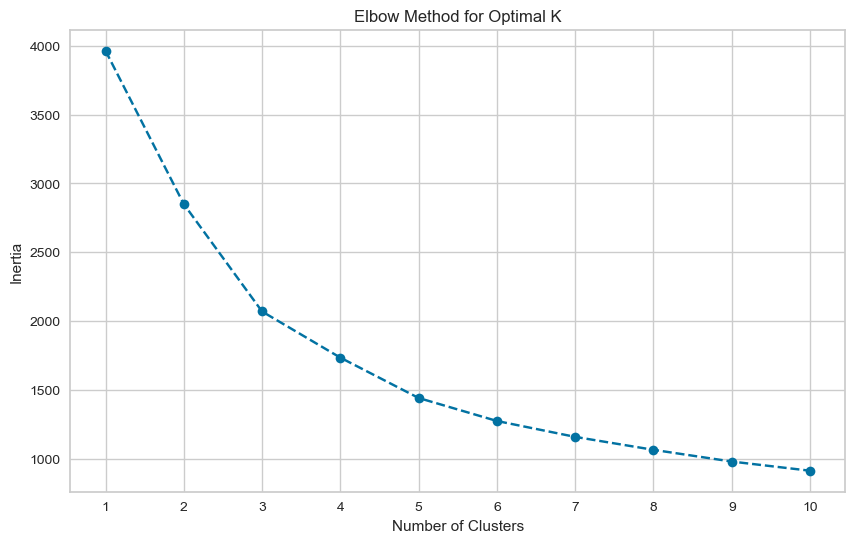

In [101]:
scaler = StandardScaler()
clv_scaled = scaler.fit_transform(rfm_data[['frequency','recency','T','monetary_value','CLV']])

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clv_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.3590971752354335)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.3746916858305753)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.2570595531980612)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.26849349680967916)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.2536418101168387)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.2568312902294294)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.2628648050464059)


C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.2385014402927578)


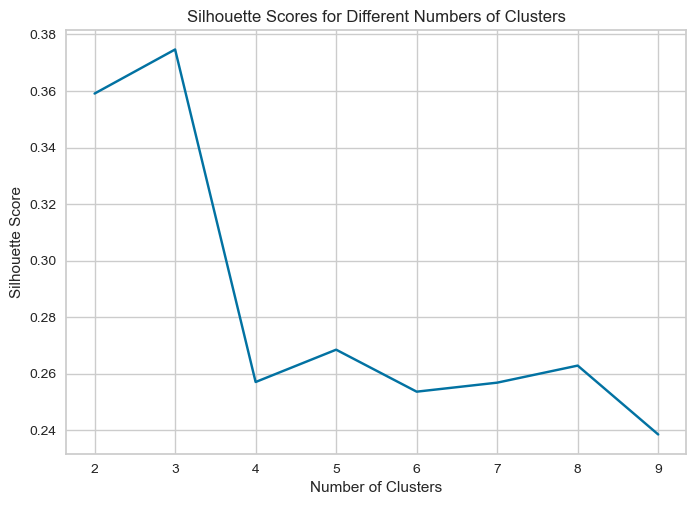

In [102]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((clv_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(clv_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_list)
plt.show()

In [103]:
# Determine the optimal number of clusters based on the elbow method
optimal_k = 3

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(clv_scaled)

# Assign cluster labels to the original DataFrame
rfm_data['Cluster'] = kmeans.labels_

# Print the count of customers in each cluster
print("Number of customers in each cluster:")
rfm_data['Cluster'].value_counts()

C:\Users\Chugu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Number of customers in each cluster:


Cluster
0    519
1    170
2    104
Name: count, dtype: int64

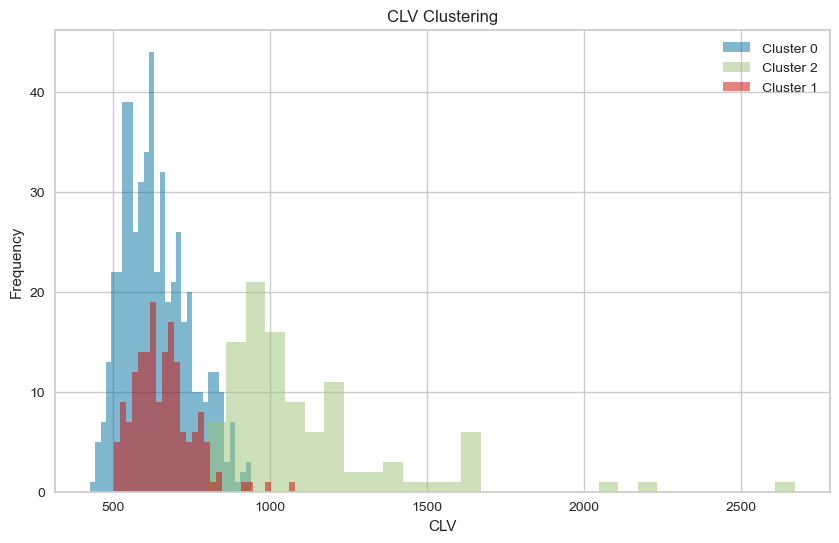

In [104]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in rfm_data['Cluster'].unique():
    plt.hist(rfm_data[rfm_data['Cluster'] == cluster]['CLV'], bins=30, alpha=0.5, label=f'Cluster {cluster}')
plt.title('CLV Clustering')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [105]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Scale back the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['frequency','recency','T','monetary_value','CLV'])
print(cluster_centers_df)

   frequency      recency            T  monetary_value          CLV
0   5.892100  1143.608863  1254.472062      331.775349   638.621629
1   3.164706   545.241176   786.335294      309.161598   659.705964
2   5.798077  1024.028846  1196.048077     1242.864527  1116.441546


In [106]:
rfm_data.head()

,frequency,recency,T,monetary_value,CLV,Cluster
Customer_ID,,,,,,
10015,2.0,996.0,1411.0,436.766000,663.625531,0
10030,6.0,1336.0,1348.0,247.824667,579.154099,0
10045,6.0,1164.0,1252.0,497.485333,735.050187,0
10060,7.0,780.0,834.0,1105.297143,1186.267142,2
10075,9.0,1106.0,1140.0,360.568556,663.898573,0


In [107]:
cluster_names = {
    0: "Premium Customers",
    1: "Active Shoppers",
    2: "Occasional Buyers"
}


# Assign cluster names using the map function
rfm_data['Cluster'] = rfm_data["Cluster"].map(cluster_names)


rfm_data

,frequency,recency,T,monetary_value,CLV,Cluster
Customer_ID,,,,,,
10015,2.0,996.0,1411.0,436.766000,663.625531,Premium Customers
10030,6.0,1336.0,1348.0,247.824667,579.154099,Premium Customers
10045,6.0,1164.0,1252.0,497.485333,735.050187,Premium Customers
10060,7.0,780.0,834.0,1105.297143,1186.267142,Occasional Buyers
10075,9.0,1106.0,1140.0,360.568556,663.898573,Premium Customers
...,...,...,...,...,...,...
21865,10.0,1397.0,1440.0,166.604200,493.870767,Premium Customers
21880,7.0,1074.0,1083.0,893.609143,1024.816308,Occasional Buyers
21895,4.0,1135.0,1139.0,584.465000,755.735810,Premium Customers


In [110]:
rfm_data.reset_index(inplace=True)
rfm_data.rename(columns={"T":"Total_Duration"},inplace=True)
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     793 non-null    int32  
 1   frequency       793 non-null    float64
 2   recency         793 non-null    float64
 3   Total_Duration  793 non-null    float64
 4   monetary_value  793 non-null    float64
 5   CLV             793 non-null    float64
 6   Cluster         793 non-null    object 
dtypes: float64(5), int32(1), object(1)
memory usage: 40.4+ KB


In [111]:
sqlOperation(rfm_data,"CLV")